# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [29]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here.

# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

#Confirm the df was created
print(student_data.head())


   Age  Tardies
0   17       10
1   51        1
2   27        5
3   21        9
4   36        4


Draw a dispersion diagram (scatter plot) for the data.

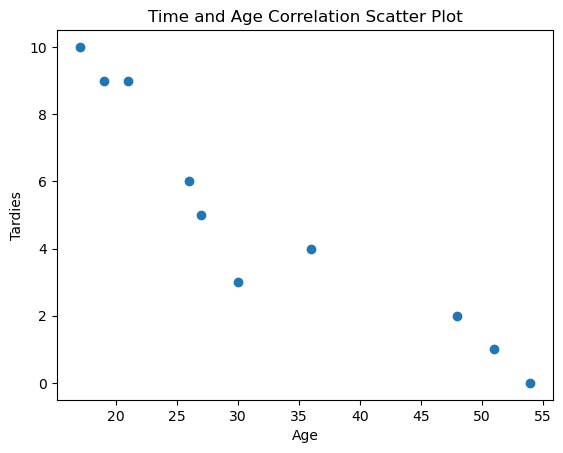

In [5]:
# Your code here

#Choosing columns to be used
plt.scatter(student_data['Age'], student_data['Tardies'])

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Time and Age Correlation Scatter Plot')

# Display the plot
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Yes, I understand that there is a negative correlation between age and tardies. My Hypothesis would be that as age progresses, tardies will be less frequent.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [10]:
# Calculate Covariance Matrix
cov_matrix = np.cov(x, y)  # Calculate the covariance matrix between x and y

# Extract the covariance value (the off-diagonal element of the covariance matrix)
cov_xy = cov_matrix[0, 1]

# Calculate standard deviations
std_x = np.std(x)
std_y = np.std(y)

# Calculate correlation
corr_xy = cov_xy / (std_x * std_y)

# Print results
print("Covariance:", cov_xy)
print("Correlation between variables:", corr_xy)

Covariance: -45.56666666666666
Correlation between variables: -1.0435140985430134


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [13]:
# your explanation here

#Define/reshape X, y
X = student_data['Age'].values.reshape(-1, 1)  # Independent variable (age)
y = student_data['Tardies'].values  # Dependent variable (tardies)

# Create the regression model
reg = LinearRegression()

# Fit the model
reg.fit(X, y)

# Predict using the model
y_pred = reg.predict(X)

# Print the regression coefficients and intercept
print("Regression Coefficients (Slope):", reg.coef_)
print("Intercept:", reg.intercept_)


Regression Coefficients (Slope): [-0.24282077]
Intercept: 12.888803363135768


Plot your regression model on your scatter plot.

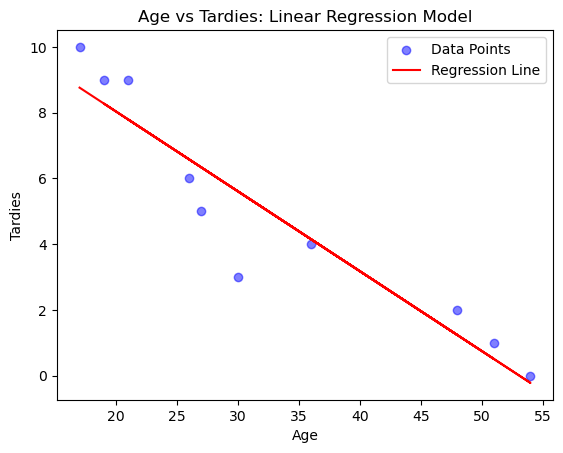

In [15]:
# Your code here.

# Visualizing the results: Actual vs Predicted
plt.scatter(X, y, color='blue', alpha=0.5, label="Data Points")  # Plotting the actual data points
plt.plot(X, y_pred, color='red', label="Regression Line")  # Plotting the regression line
plt.xlabel('Age')  # Label for x-axis
plt.ylabel('Tardies')  # Label for y-axis
plt.title('Age vs Tardies: Linear Regression Model')  # Title for the plot
plt.legend()  # Adds the legend
plt.show()  # Displays the plot


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

#The regression line is downward sloping, indicating a negative linear relationship between age and tardies. This suggests that older individuals tend to be more punctual with fewer tardies.
#Conclusion: The hypothesis that as age increases, the number of tardies decreases seems supported by the data.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [19]:
# Your code here.

vehicles = pd.read_csv(r"C:\Users\sombe\Downloads\vehicles.csv")

print(vehicles.head())

               Make                Model  Year  Engine Displacement  \
0        AM General    DJ Po Vehicle 2WD  1984                  2.5   
1        AM General     FJ8c Post Office  1984                  4.2   
2        AM General  Post Office DJ5 2WD  1985                  2.5   
3        AM General  Post Office DJ8 2WD  1985                  4.2   
4  ASC Incorporated                  GNX  1987                  3.8   

   Cylinders     Transmission        Drivetrain                Vehicle Class  \
0        4.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
1        6.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
2        4.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
3        6.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
4        6.0  Automatic 4-spd  Rear-Wheel Drive                 Midsize Cars   

  Fuel Type  Fuel Barrels/Year  City MPG  Highway MPG  Combined MPG  \
0   Regular          

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [21]:
# Your code here.

# Calculate the correlation matrix for the variables
correlation_matrix = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Extract correlations with 'CO2 Emission Grams/Mile'
correlations_with_outcome = correlation_matrix['CO2 Emission Grams/Mile']
print("\nCorrelations with CO2 Emission Grams/Mile:")
print(correlations_with_outcome)

                             Year  Cylinders  Fuel Barrels/Year  Combined MPG  \
Year                     1.000000   0.082469          -0.221084      0.204751   
Cylinders                0.082469   1.000000           0.739517     -0.698648   
Fuel Barrels/Year       -0.221084   0.739517           1.000000     -0.909743   
Combined MPG             0.204751  -0.698648          -0.909743      1.000000   
Fuel Cost/Year          -0.091913   0.778153           0.916208     -0.875185   
CO2 Emission Grams/Mile -0.222300   0.752393           0.986189     -0.926229   

                         Fuel Cost/Year  CO2 Emission Grams/Mile  
Year                          -0.091913                -0.222300  
Cylinders                      0.778153                 0.752393  
Fuel Barrels/Year              0.916208                 0.986189  
Combined MPG                  -0.875185                -0.926229  
Fuel Cost/Year                 1.000000                 0.930865  
CO2 Emission Grams/Mile       

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [27]:
# Your code here.

X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]  # Features
y = vehicles['CO2 Emission Grams/Mile']  # Target variable (CO2 Emissions)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the regression model
reg = LinearRegression()

# Fit the model
reg.fit(X_train, y_train)

# Make predictions using the test set
y_pred = reg.predict(X_test)

# Output the regression coefficients and intercept
print("Regression Coefficients (Slope):", reg.coef_)
print("Intercept:", reg.intercept_)

# Calculate the R-squared value to evaluate the model's performance
r_squared = reg.score(X_test, y_test)
print("R-squared value:", r_squared)


Regression Coefficients (Slope): [-0.31558675  1.79402632 19.23102729 -2.9335732   0.03197145]
Intercept: 755.6935073143412
R-squared value: 0.9794542628636334


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [33]:
# Your code here.

# Add a constant to the independent variables (for the intercept term in the regression)
X_with_const = sm.add_constant(X)

# Create and fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(y, X_with_const)
results = model.fit()

# Print the regression summary
print(results.summary())

# The variable with the highest absolute coefficients and smallest p-values is the most important variables since it would predict higher CO2 emissions.
    #after analyzing results, this variable is the Fuels/Barrels/Year
# Also, the varaible with the lowest absolute coeficient would be important, pedicting less CO2 emissions.
    #after analyzin the rersults, this variable wouldbe Combines MPG
#The model suggests that fuel consumption and fuel efficiency are important in determining the CO2 emissions of a vehicle.


                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Fri, 10 Jan 2025   Prob (F-statistic):               0.00
Time:                             16:57:07   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [35]:
# Your code here.

# Data for the party analysis
data = {
    'X': [1, 3, 4, 6, 8, 9, 11, 14],  # Number of people invited
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]   # Number of people who attended
}

# Create DataFrame
df_party = pd.DataFrame(data)

# Display the DataFrame
print(df_party)


    X   Y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

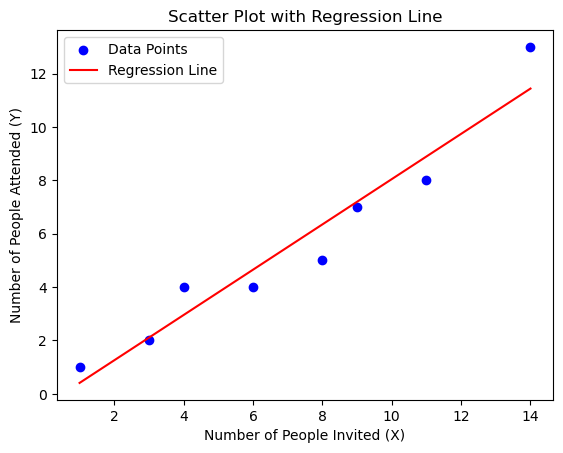

In [37]:
# Your code here.

# Data
X = df_party['X'].values.reshape(-1, 1)  # Independent variable (number of people invited)
y = df_party['Y'].values  # Dependent variable (number of people attended)

# Create the regression model
reg = LinearRegression()

# Fit the model
reg.fit(X, y)

# Predict using the model
y_pred = reg.predict(X)

# Plotting the data points (scatter plot)
plt.scatter(X, y, color='blue', label='Data Points')

# Plotting the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Labels and title
plt.xlabel('Number of People Invited (X)')
plt.ylabel('Number of People Attended (Y)')
plt.title('Scatter Plot with Regression Line')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

The data points follow an upward trend. As the number of people invited increases, the number of people attending also increases.
The red regression line fits the data points well, indicating a positive linear relationship between the two variables. This suggests that the more people you invite, the more people attend, which is a consistent pattern.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Outliers: [], []
There are no outliers.


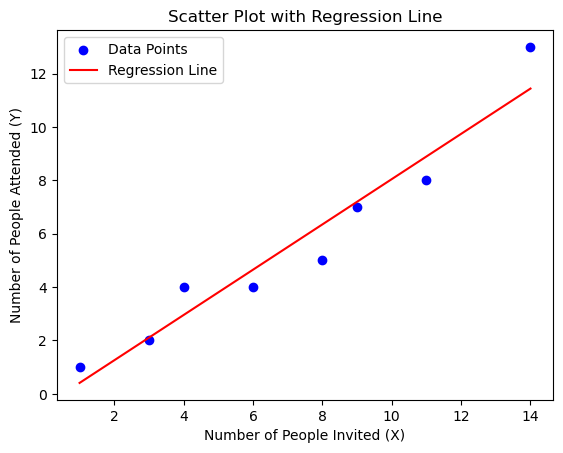

In [39]:
#Your code here.

# Calculate residuals (difference between actual and predicted values)
residuals = y - y_pred

# Set a threshold for outlier detection (e.g., 2 standard deviations away from the mean of residuals)
threshold = 2 * np.std(residuals)

# Identify the outliers (where residuals are beyond the threshold)
outliers = np.abs(residuals) > threshold

# Print the outliers (X and Y values of the outliers)
print(f"Outliers: {X[outliers]}, {y[outliers]}")

if np.sum(outliers) == 0:
    print("There are no outliers.")
else:
    print(f"There are {np.sum(outliers)} outliers.") 


# Data
X = df_party['X'].values.reshape(-1, 1)  # Independent variable (number of people invited)
y = df_party['Y'].values  # Dependent variable (number of people attended)

# Create the regression model
reg = LinearRegression()

# Fit the model
reg.fit(X, y)

# Predict using the model
y_pred = reg.predict(X)

# Plotting the data points (scatter plot)
plt.scatter(X, y, color='blue', label='Data Points')

# Plotting the regression line
plt.plot(X, y_pred, color='red', label='Regression Line')

# Labels and title
plt.xlabel('Number of People Invited (X)')
plt.ylabel('Number of People Attended (Y)')
plt.title('Scatter Plot with Regression Line')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*